<a href="https://colab.research.google.com/github/ramatsemela8/Project2/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Loading dataset

df = pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
# Handling missing values, nulls, NaNs
df.fillna(df.median(), inplace=True)


In [6]:
# existence of all columns
expected_columns = ['Time', 'Amount', 'Class'] + [f'V{i}' for i in range(1, 29)]
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")
    # handle missing columns by adding them as NaNs:
    for col in missing_columns:
        df[col] = np.nan


In [8]:
# Handling missing columns with median
df.fillna(df.median(), inplace=True)

In [9]:
# Spittling data into features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

In [10]:
# Standardize 'Amount' and 'Time' features
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

In [11]:
# Train-test split with stratification for balanced class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
# Class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
# Adjust n_neighbors to handle limited minority class samples
smote = SMOTE(random_state=42, k_neighbors=2)  # Reduced from default 5 to avoid error
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [14]:
# RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [15]:
# Fitting the model
clf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf.predict(X_test)

In [16]:
# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56856     8]
 [   19    79]]


In [17]:
# Precision-Recall Curve
y_pred_proba = clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"Area Under Precision-Recall Curve (AUPRC): {pr_auc:.4f}")


Area Under Precision-Recall Curve (AUPRC): 0.8683


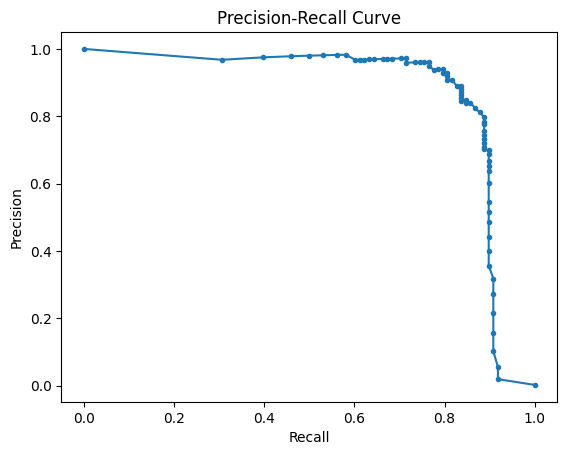

In [18]:
# Matplotlib visualization(non-interactive)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [23]:
# Customize layout
fig.update_layout(
    title='Interactive Precision-Recall Curve',
    xaxis_title='Recall',
    yaxis_title='Precision',
    hovermode='closest'
)

# Interactive plot
fig.show()
